# Regresión Lineal con Eager Execution en TensorFlow 2.0


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class Model:
    def __init__(self):
        self.W = tf.Variable(16.0)
        self.b = tf.Variable(10.0)

    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()
model(20)

<tf.Tensor: id=19, shape=(), dtype=float32, numpy=330.0>

In [2]:
TRUE_W = 3.0 # slope
TRUE_b = 0.5 # intercept

NUM_EXAMPLES = 1000

X = tf.random.normal(shape=(NUM_EXAMPLES,))
noise = tf.random.normal(shape=(NUM_EXAMPLES,))
y = X * TRUE_W + TRUE_b + noise

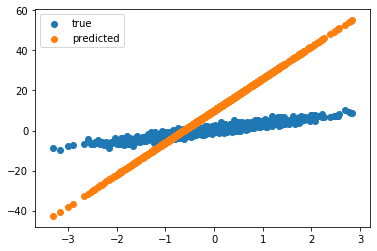

In [3]:
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()

In [4]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [5]:
def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))

    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)

Epoch 0: Loss: 258.5689697265625
Epoch 1: Loss: 166.05706787109375
Epoch 2: Loss: 106.77278137207031
Epoch 3: Loss: 68.78181457519531
Epoch 4: Loss: 44.436100006103516
Epoch 5: Loss: 28.834692001342773
Epoch 6: Loss: 18.83685874938965
Epoch 7: Loss: 12.42995834350586
Epoch 8: Loss: 8.324228286743164
Epoch 9: Loss: 5.693155288696289
Epoch 10: Loss: 4.007083892822266
Epoch 11: Loss: 2.9265995025634766
Epoch 12: Loss: 2.234192132949829
Epoch 13: Loss: 1.7904760837554932
Epoch 14: Loss: 1.506129264831543
Epoch 15: Loss: 1.3239105939865112
Epoch 16: Loss: 1.2071393728256226
Epoch 17: Loss: 1.1323083639144897
Epoch 18: Loss: 1.0843547582626343
Epoch 19: Loss: 1.053624153137207


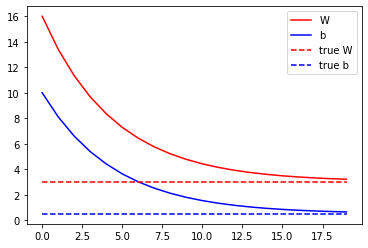

In [6]:
model = Model()
Ws, bs = [], []
epochs = 20
for epoch in range(epochs):
    Ws.append(model.W.numpy()) # eager execution allows us to do this
    bs.append(model.b.numpy())

    current_loss = loss(y, model(X))

    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")

plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

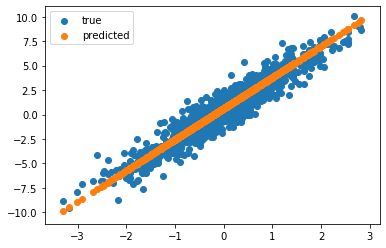

In [7]:
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()